In [ ]:

import json
import pandas as pd
import yaml
import pickle
import numpy as np
import wandb
import os

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, balanced_accuracy_score, accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from gensim.models import Word2Vec
import sys

# Import functions from preprocessing module
sys.path.append('..')

Import successful!
Data loaded


## Load data

In [ ]:
df = load_processed_data()
train_data = df["train"]
test_data = df["test"]
dev_data = df["dev"]

X_train, y_train = train_data["lemma"], train_data["label"]
X_test, y_test = test_data["lemma"], test_data["label"]
X_dev, y_dev = dev_data["lemma"], dev_data["label"]

Data loaded


## TF-IDF

In [ ]:
# Initialize the TF-IDF Vectorizer
tfidf_params_list = [
    {'max_features': 3000, 'ngram_range': (1, 1), 'min_df': 5},
    {'max_features': 3000, 'ngram_range': (1, 2), 'min_df': 5},
    {'max_features': 5000, 'ngram_range': (1, 1), 'min_df': 5},
    {'max_features': 5000, 'ngram_range': (1, 2), 'min_df': 5},
    {'max_features': 10000, 'ngram_range': (1, 1), 'min_df': 5},
    {'max_features': 10000, 'ngram_range': (1, 2), 'min_df': 5}
]

In [ ]:
wandb.init(project="online_sexism_detection", name="tfidf_logistic_regression") 

for tfidf_params in tfidf_params_list:
    vectorizer = TfidfVectorizer(**tfidf_params)
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train_tfidf, y_train)

    logistic_model = LogisticRegression(max_iter=500, class_weight='balanced')
    logistic_model.fit(X_resampled, y_resampled)

    y_pred_logistic = logistic_model.predict(X_test_tfidf)



    # Evaluate
    print(f"TF-IDF Params: {tfidf_params}")
    print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
    print(classification_report(y_test, y_pred_logistic))

    wandb.log({
        'tfidf_params': tfidf_params,
        "f1": f1_score(y_test, y_pred_logistic),
        "balanced_accuracy": balanced_accuracy_score(y_test, y_pred_logistic),
        "accuracy": accuracy_score(y_test, y_pred_logistic),
    })
# Save the trained model
model_file_tfidf = f"tfidf_logistic_model_{tfidf_params['max_features']}_{tfidf_params['ngram_range']}.pkl"
with open(model_file_tfidf, "wb") as f:
    pickle.dump(logistic_model, f)
print(f"TF-IDF Logistic Regression model saved as {model_file_tfidf}")

# Finish Weights & Biases session
wandb.finish()


/Users/mac/Downloads/online_sexism_detection/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/mac/Downloads/online_sexism_detection/.venv/lib/python3.9/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


TF-IDF Params: {'max_features': 3000, 'ngram_range': (1, 1), 'min_df': 5}
Accuracy: 0.8015
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      3030
           1       0.58      0.66      0.62       970

    accuracy                           0.80      4000
   macro avg       0.73      0.75      0.74      4000
weighted avg       0.81      0.80      0.81      4000



/Users/mac/Downloads/online_sexism_detection/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/mac/Downloads/online_sexism_detection/.venv/lib/python3.9/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


TF-IDF Params: {'max_features': 3000, 'ngram_range': (1, 2), 'min_df': 5}
Accuracy: 0.8155
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      3030
           1       0.61      0.68      0.64       970

    accuracy                           0.82      4000
   macro avg       0.75      0.77      0.76      4000
weighted avg       0.82      0.82      0.82      4000



/Users/mac/Downloads/online_sexism_detection/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/mac/Downloads/online_sexism_detection/.venv/lib/python3.9/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


TF-IDF Params: {'max_features': 5000, 'ngram_range': (1, 1), 'min_df': 5}
Accuracy: 0.80475
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      3030
           1       0.59      0.65      0.62       970

    accuracy                           0.80      4000
   macro avg       0.74      0.75      0.74      4000
weighted avg       0.81      0.80      0.81      4000



/Users/mac/Downloads/online_sexism_detection/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/mac/Downloads/online_sexism_detection/.venv/lib/python3.9/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


TF-IDF Params: {'max_features': 5000, 'ngram_range': (1, 2), 'min_df': 5}
Accuracy: 0.8175
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      3030
           1       0.61      0.67      0.64       970

    accuracy                           0.82      4000
   macro avg       0.75      0.77      0.76      4000
weighted avg       0.82      0.82      0.82      4000



/Users/mac/Downloads/online_sexism_detection/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/mac/Downloads/online_sexism_detection/.venv/lib/python3.9/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


TF-IDF Params: {'max_features': 10000, 'ngram_range': (1, 1), 'min_df': 5}
Accuracy: 0.80475
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      3030
           1       0.59      0.65      0.62       970

    accuracy                           0.80      4000
   macro avg       0.74      0.75      0.74      4000
weighted avg       0.81      0.80      0.81      4000



/Users/mac/Downloads/online_sexism_detection/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/mac/Downloads/online_sexism_detection/.venv/lib/python3.9/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


TF-IDF Params: {'max_features': 10000, 'ngram_range': (1, 2), 'min_df': 5}
Accuracy: 0.815
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      3030
           1       0.61      0.66      0.63       970

    accuracy                           0.81      4000
   macro avg       0.75      0.76      0.75      4000
weighted avg       0.82      0.81      0.82      4000



accuracy,▁▁▇▂█▂▇
balanced_accuracy,▁▁█▂▇▂▅
f1,▁▁█▂█▂▆
accuracy,0.815
balanced_accuracy,0.76224
f1,0.63366


## Word2Vec

In [ ]:
word2vec_params_list = [
    {'vector_size': 50, 'window': 5, 'min_count': 1},
    {'vector_size': 100, 'window': 5, 'min_count': 1},
    {'vector_size': 200, 'window': 5, 'min_count': 1},
    {'vector_size': 300, 'window': 5, 'min_count': 1},
    {'vector_size': 300, 'window':10 , 'min_count': 1},
    {'vector_size': 300, 'window':20 , 'min_count': 1}
]

In [ ]:

wandb.init(project="online_sexism_detection", name="word2vec_logistic_regression")

for word2vec_params in word2vec_params_list:
    X_processed_train = X_train.apply(lambda x: x.split()).tolist()
    X_processed_test = X_test.apply(lambda x: x.split()).tolist()

    word2vec_model = Word2Vec(sentences=X_processed_train, **word2vec_params)

    def vectorize_sentences(sentences, model):
        vectors = []
        for sentence in sentences:
            word_vectors = [model.wv[word] for word in sentence if word in model.wv]
            if word_vectors:
                vectors.append(np.mean(word_vectors, axis=0))
            else:
                vectors.append(np.zeros(model.vector_size))
        return np.array(vectors)

    X_train_vectors = vectorize_sentences(X_processed_train, word2vec_model)
    X_test_vectors = vectorize_sentences(X_processed_test, word2vec_model)

    smote = SMOTE(random_state=42)
    X_resampled_w2v, y_resampled_w2v = smote.fit_resample(X_train_vectors, y_train)

    logistic_model_w2v = LogisticRegression(max_iter=500, class_weight='balanced')
    logistic_model_w2v.fit(X_resampled_w2v, y_resampled_w2v)


    y_pred_logistic_w2v = logistic_model_w2v.predict(X_test_vectors)
    
    # Evaluate
    print(f"Word2Vec Params: {word2vec_params}")
    print("Accuracy:", accuracy_score(y_test, y_pred_logistic_w2v))
    print(classification_report(y_test , y_pred_logistic_w2v))

    # Log results to Weights & Biases
    wandb.log({
        'word2vec_params': word2vec_params,
        "f1": f1_score(y_test, y_pred_logistic_w2v),
        "balanced_accuracy": balanced_accuracy_score(y_test, y_pred_logistic_w2v),
        "accuracy": accuracy_score(y_test, y_pred_logistic_w2v),
    })

# Save the trained model
model_file_w2v = f"word2vec_logistic_model_{word2vec_params['vector_size']}.pkl"
with open(model_file_w2v, "wb") as f:
    pickle.dump(logistic_model_w2v, f)
print(f"Word2Vec Logistic Regression model saved as {model_file_w2v}")

wandb.finish()

wandb: Currently logged in as: e12409115 (online_sexism_detection). Use `wandb login --relogin` to force relogin


/Users/mac/Downloads/online_sexism_detection/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/mac/Downloads/online_sexism_detection/.venv/lib/python3.9/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Word2Vec Params: {'vector_size': 50, 'window': 5, 'min_count': 1}
Accuracy: 0.75725
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      3030
           1       0.00      0.00      0.00       970

    accuracy                           0.76      4000
   macro avg       0.38      0.50      0.43      4000
weighted avg       0.57      0.76      0.65      4000



/Users/mac/Downloads/online_sexism_detection/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/mac/Downloads/online_sexism_detection/.venv/lib/python3.9/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Word2Vec Params: {'vector_size': 100, 'window': 5, 'min_count': 1}
Accuracy: 0.7575
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      3030
           1       0.00      0.00      0.00       970

    accuracy                           0.76      4000
   macro avg       0.38      0.50      0.43      4000
weighted avg       0.57      0.76      0.65      4000



/Users/mac/Downloads/online_sexism_detection/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mac/Downloads/online_sexism_detection/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mac/Downloads/online_sexism_detection/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

Word2Vec Params: {'vector_size': 200, 'window': 5, 'min_count': 1}
Accuracy: 0.7575
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      3030
           1       0.00      0.00      0.00       970

    accuracy                           0.76      4000
   macro avg       0.38      0.50      0.43      4000
weighted avg       0.57      0.76      0.65      4000



/Users/mac/Downloads/online_sexism_detection/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mac/Downloads/online_sexism_detection/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mac/Downloads/online_sexism_detection/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

Word2Vec Params: {'vector_size': 300, 'window': 5, 'min_count': 1}
Accuracy: 0.7575
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      3030
           1       0.00      0.00      0.00       970

    accuracy                           0.76      4000
   macro avg       0.38      0.50      0.43      4000
weighted avg       0.57      0.76      0.65      4000



/Users/mac/Downloads/online_sexism_detection/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mac/Downloads/online_sexism_detection/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mac/Downloads/online_sexism_detection/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

Word2Vec Params: {'vector_size': 300, 'window': 10, 'min_count': 1}
Accuracy: 0.7575
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      3030
           1       0.00      0.00      0.00       970

    accuracy                           0.76      4000
   macro avg       0.38      0.50      0.43      4000
weighted avg       0.57      0.76      0.65      4000



/Users/mac/Downloads/online_sexism_detection/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mac/Downloads/online_sexism_detection/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mac/Downloads/online_sexism_detection/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

Word2Vec Params: {'vector_size': 300, 'window': 20, 'min_count': 1}
Accuracy: 0.7575
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      3030
           1       0.00      0.00      0.00       970

    accuracy                           0.76      4000
   macro avg       0.38      0.50      0.43      4000
weighted avg       0.57      0.76      0.65      4000



/Users/mac/Downloads/online_sexism_detection/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mac/Downloads/online_sexism_detection/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mac/Downloads/online_sexism_detection/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

accuracy,▁█████
balanced_accuracy,▁█████
f1,▁▁▁▁▁▁
accuracy,0.7575
balanced_accuracy,0.5
f1,0


# Metrics
## 1. Logistic Regression - TFIDF

In [ ]:
from utils.metrics import plot_confusion_matrix, plot_calibration_curve, plot_probability_distribution, plot_boxplot_predicted_probabilities, plot_balanced_accuracy_vs_cutoff, plot_roc_curve_with_optimal_point, print_classification_report

In [30]:
df_output = pd.read_csv("../data_submission/logistic_TFIDF_predictions.csv", index_col=0)
df_output.reset_index(drop=True, inplace=True)
df_output.head(2)

,y_pred,prob_0,prob_1,logit_0,logit_1,label
0,0,0.866904,0.133096,NaN,NaN,0
1,0,0.586243,0.413757,NaN,NaN,0


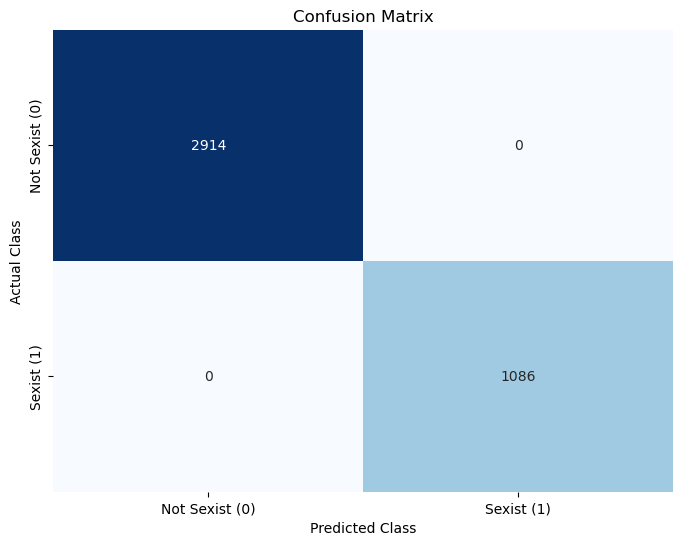

In [31]:
plot_confusion_matrix(df_output)

In [32]:
print_classification_report(df_output)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2914
           1       1.00      1.00      1.00      1086

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [33]:
df_output['y_pred'] = (df_output['prob_1'] > 0.25)

In [34]:
print_classification_report(df_output)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.54      0.70      2914
           1       0.45      1.00      0.62      1086

    accuracy                           0.67      4000
   macro avg       0.72      0.77      0.66      4000
weighted avg       0.85      0.67      0.68      4000



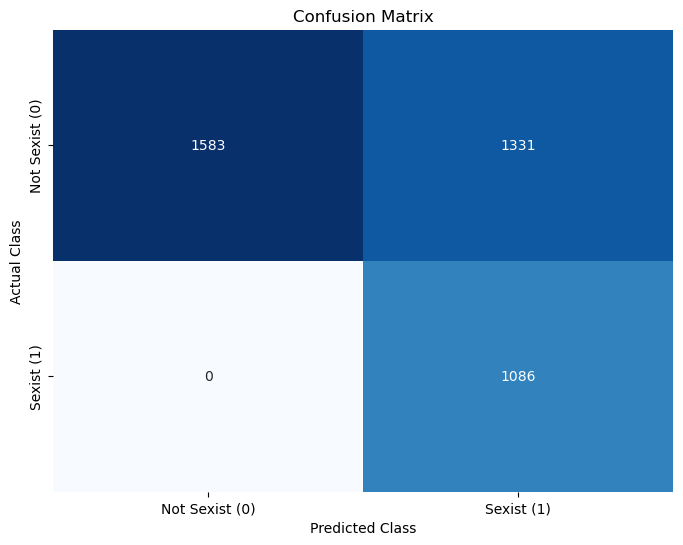

In [35]:
plot_confusion_matrix(df_output)

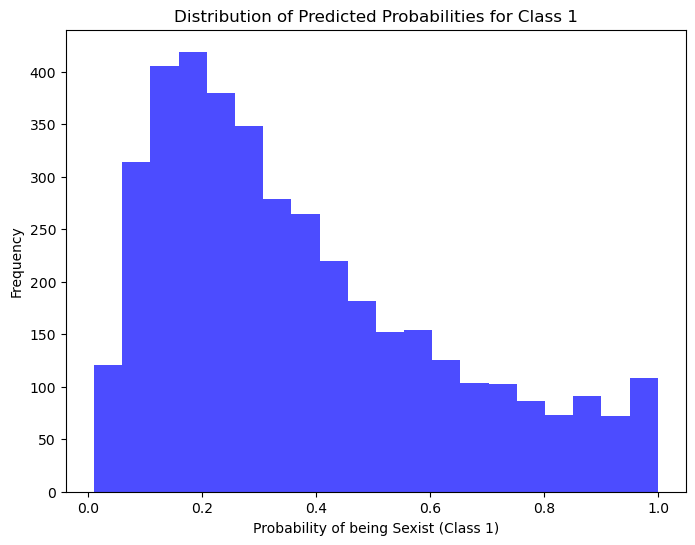

In [36]:
plot_probability_distribution(df_output)

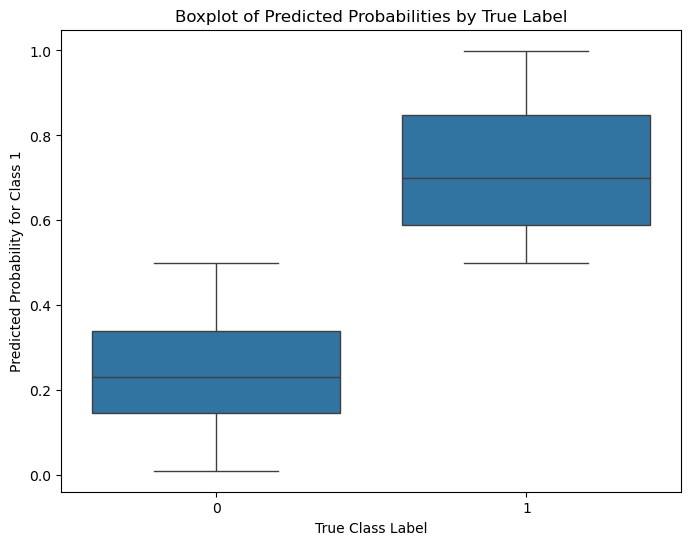

In [37]:
plot_boxplot_predicted_probabilities(df_output)

## 2. Logistic Regression - Word2vec

In [38]:
df_output = pd.read_csv("../data_submission/logistic_w2v_predictions.csv", index_col=0)
df_output.reset_index(drop=True, inplace=True)
df_output.head(2)

,y_pred,prob_0,prob_1,logit_0,logit_1,label
0,1,0.362843,0.637157,NaN,NaN,0
1,1,0.393677,0.606323,NaN,NaN,0


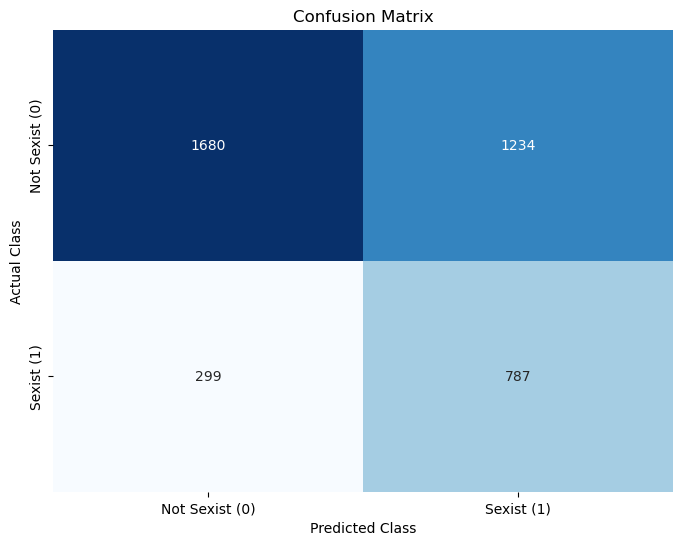

In [39]:
plot_confusion_matrix(df_output)

In [40]:
print_classification_report(df_output)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.58      0.69      2914
           1       0.39      0.72      0.51      1086

    accuracy                           0.62      4000
   macro avg       0.62      0.65      0.60      4000
weighted avg       0.72      0.62      0.64      4000



In [41]:
df_output['y_pred'] = (df_output['prob_1'] > 0.25)

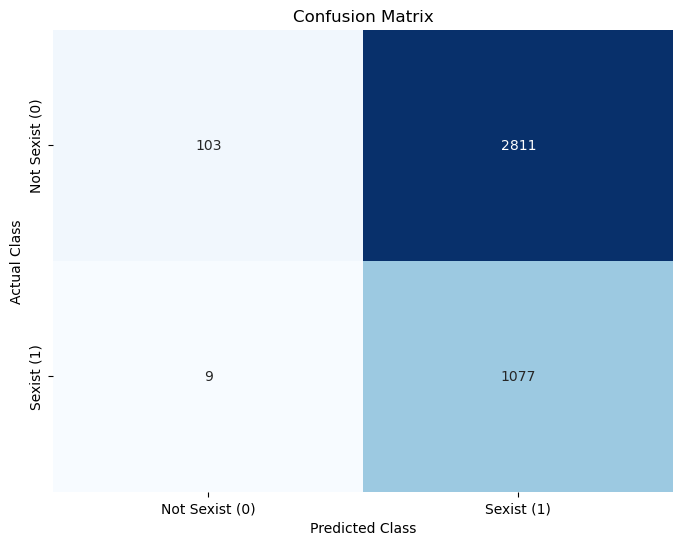

In [42]:
plot_confusion_matrix(df_output)

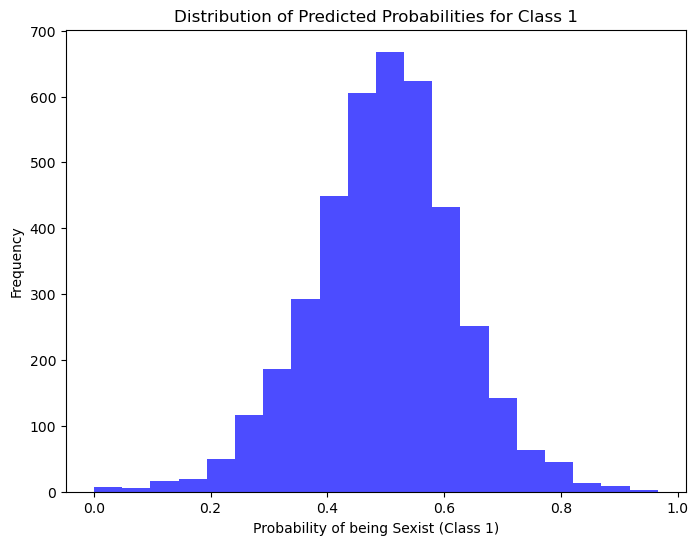

In [43]:
plot_probability_distribution(df_output)

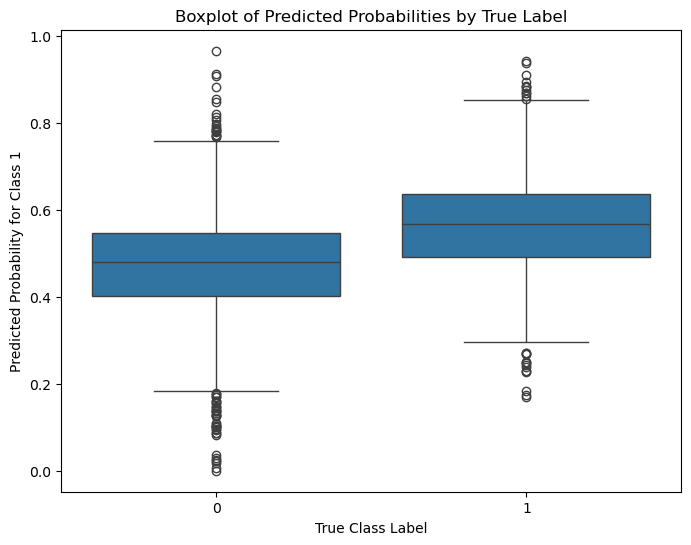

In [44]:
plot_boxplot_predicted_probabilities(df_output)